# üìö Table des mati√®res du projet Fine-Tuning GPT-Neo 1.3B (Arabe QA)

## üìå Sch√©ma du Notebook : Fine-Tuning GPT-Neo 1.3B pour la QA en arabe

```plaintext
Jeux de donn√©es CSV (arabicmmlu, alghafa, madinahqa, aratrust)
          ‚îÇ
          ‚ñº
Conversion au format g√©n√©ration (`### ÿ≥ÿ§ÿßŸÑ` / `### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©`)
          ‚îÇ
          ‚ñº
Sauvegarde en JSONL
          ‚îÇ
          ‚ñº
Chargement et split (train/test) avec HuggingFace Datasets
          ‚îÇ
          ‚ñº
Tokenisation (Padding & Truncation, `max_length=512`)
          ‚îÇ
          ‚ñº
Chargement GPT-Neo avec QLoRA 4-bit (LoRA : `q_proj`, `v_proj`)
          ‚îÇ
          ‚ñº
Fine-Tuning (`SFTTrainer`, 500 puis 1000 steps)
          ‚îÇ
          ‚ñº
√âvaluation du mod√®le (Accuracy, Precision, Recall, F1)
          ‚îÇ
          ‚ñº
Sauvegarde mod√®le fine-tun√©
          ‚îÇ
          ‚ñº
Cr√©ation de l‚Äôindex FAISS (embeddings multilingues SentenceTransformers)
          ‚îÇ
          ‚ñº
√âvaluation du Retriever FAISS (Recall@k, MRR, Exact Match, Word-F1)
          ‚îÇ
          ‚ñº
Pipeline RAG complet (`Retriever FAISS` + `GPT-Neo fine-tun√©`)
          ‚îÇ
          ‚ñº
√âvaluation finale de la g√©n√©ration (Exact Match, Word-F1, ROUGE, BERTScore)


# üìä R√©sultats d'√âvaluation du Mod√®le GPT-Neo Fine-Tun√© (G√©n√©ration)
*(sur 100 exemples d'un total de 16,146 disponibles)*

| M√©trique     | Valeur |
|--------------|--------|
| **Accuracy** | 0.0200 |
| **Precision**| 0.0101 |
| **Recall**   | 0.0101 |
| **F1-score** | 0.0101 |

---

# üìö R√©sultats d'√âvaluation du Retriever FAISS


| M√©trique              | Valeur |
|-----------------------|--------|
| **Recall@5**          | 0.8600 |
| **MRR@5**             | 0.7887 |
| **Exact Match (EM)**  | 0.0000 |
| **Word-level F1**     | 0.6113 |

---

# üìä R√©sultats de l'√âvaluation de la G√©n√©ration du Mod√®le GPT-Neo

| M√©trique              | Valeur  |
|-----------------------|---------|
| **Exact Match (EM)**  | 0.0000  |
| **Word-level F1**     | 0.0000  |
| **ROUGE-L**           | 0.0000  |
| **BERTScore-F1**      | 0.6119  |

---



# üì¶ Installation des d√©pendances

**transformers**, **datasets**, **trl**, **peft**, **bitsandbytes**, **accelerate**

Montage de **Google Drive**

In [ ]:
pip install transformers accelerate peft bitsandbytes datasets trl


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 76.0/76.0 MB 9.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 487.4/487.4 kB 18.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 335.7/335.7 kB 23.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 183.9/183.9 kB 15.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 10.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

prepare les doner

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# üìù Pr√©paration des donn√©es

1. Chargement des fichiers CSV : arabicmmlu.csv, alghafa.csv, madinahqa.csv, aratrust.csv.

2. Construction des prompts (format ### ÿ≥ÿ§ÿßŸÑ / ### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©)

3. Sauvegarde en fichier .jsonl

In [ ]:
import pandas as pd

# === 1. arabicmmlu.csv ===
print("\nüìò Fichier : arabicmmlu.csv")
df1 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/arabicmmlu.csv")
print("üîë Colonnes :", df1.columns.tolist())
print("üëÄ Exemple de lignes :")
print(df1.head(2))
print("="*60)

# === 2. alghafa.csv ===
print("\nüìò Fichier : alghafa.csv")
df2 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/alghafa.csv")
print("üîë Colonnes :", df2.columns.tolist())
print("üëÄ Exemple de lignes :")
print(df2.head(2))
print("="*60)

# === 3. madinahqa.csv ===
print("\nüìò Fichier : madinahqa.csv")
df3 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/madinahqa.csv")
df3.columns = df3.columns.str.strip()  # nettoyage √©ventuel des colonnes
print("üîë Colonnes :", df3.columns.tolist())
print("üëÄ Exemple de lignes :")
print(df3.head(2))
print("="*60)

# === 4. aratrust.csv ===
print("\nüìò Fichier : aratrust.csv")
df4 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/aratrust.csv")
df4.columns = df4.columns.str.strip()
print("üîë Colonnes :", df4.columns.tolist())
print("üëÄ Exemple de lignes :")
print(df4.head(2))
print("="*60)


In [ ]:
import pandas as pd

# === 1. arabicmmlu.csv ===
print("\nüìò Fichier : arabicmmlu.csv")
df1 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/arabicmmlu.csv")
print("üîë Colonnes :", df1.columns.tolist())
print("üëÄ Exemple de lignes :")
print(df1.head(2))
print("="*60)

# === 2. alghafa.csv ===
print("\nüìò Fichier : alghafa.csv")
df2 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/alghafa.csv")
print("üîë Colonnes :", df2.columns.tolist())
print("üëÄ Exemple de lignes :")
print(df2.head(2))
print("="*60)

# === 3. madinahqa.csv ===
print("\nüìò Fichier : madinahqa.csv")
df3 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/madinahqa.csv")
df3.columns = df3.columns.str.strip()  # nettoyage √©ventuel des colonnes
print("üîë Colonnes :", df3.columns.tolist())
print("üëÄ Exemple de lignes :")
print(df3.head(2))
print("="*60)

# === 4. aratrust.csv ===
print("\nüìò Fichier : aratrust.csv")
df4 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/aratrust.csv")
df4.columns = df4.columns.str.strip()
print("üîë Colonnes :", df4.columns.tolist())
print("üëÄ Exemple de lignes :")
print(df4.head(2))
print("="*60)


In [ ]:
import pandas as pd
import json

def make_prompt_response(question, context="", options="", answer=""):
    prompt = "### ÿ≥ÿ§ÿßŸÑ:\n"
    if context:
        prompt += f"{str(context).strip()}\n"
    prompt += f"{str(question).strip()}\n"
    if options:
        prompt += f"{str(options).strip()}\n"
    prompt += "\n### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:\n" + str(answer).strip()
    return prompt

def make_explanatory_answer(question, answer_text):
    return f"{question.strip()} ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: {answer_text.strip()}."

examples = []

# === 1. arabicmmlu.csv ===
df1 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/arabicmmlu.csv").fillna("")
letter_to_option = {
    "ÿ£": "Option 1", "ÿ®": "Option 2", "ÿ¨": "Option 3", "ÿØ": "Option 4", "ŸáŸÄ": "Option 5",
    "A": "Option 1", "B": "Option 2", "C": "Option 3", "D": "Option 4", "E": "Option 5"
}

for _, row in df1.iterrows():
    answer_key = str(row["Answer Key"]).strip()
    correct_answer = str(row.get(letter_to_option.get(answer_key, ""), "")).strip()
    options = f"ÿ£. {row['Option 1']}  ÿ®. {row['Option 2']}  ÿ¨. {row['Option 3']}  ÿØ. {row['Option 4']}  ŸáŸÄ. {row['Option 5']}"
    answer_text = make_explanatory_answer(row['Question'], correct_answer)
    prompt = make_prompt_response(row['Question'], row['Context'], options, answer_text)
    examples.append({"text": prompt})

# === 2. alghafa.csv ===
df2 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/alghafa.csv").fillna("")
index_to_option = {"0": "sol1", "1": "sol2", "2": "sol3", "3": "sol4"}

for _, row in df2.iterrows():
    answer_key = str(row["label"]).strip()
    correct_answer = str(row.get(index_to_option.get(answer_key, ""), "")).strip()
    options = f"ÿ£. {row['sol1']}  ÿ®. {row['sol2']}  ÿ¨. {row['sol3']}  ÿØ. {row['sol4']}"
    answer_text = make_explanatory_answer(row['query'], correct_answer)
    prompt = make_prompt_response(row['query'], options=options, answer=answer_text)
    examples.append({"text": prompt})

# === 3. madinahqa.csv ===
df3 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/madinahqa.csv").fillna("")
df3.columns = df3.columns.str.strip()

for _, row in df3.iterrows():
    context = f"üîπ ÿßŸÑŸÖÿµÿØÿ±: {row['Source']} | ÿßŸÑÿØŸàŸÑÿ©: {row['Country']} | ÿßŸÑŸÖÿ¨ŸÖŸàÿπÿ©: {row['Group']} | ÿßŸÑŸÖÿßÿØÿ©: {row['Subject']} | ÿßŸÑŸÖÿ≥ÿ™ŸàŸâ: {row['Level']}\nüìù ÿßŸÑÿ≥ŸäÿßŸÇ: {row['Context']}"
    answer_key = str(row["Answer Key"]).strip()
    correct_answer = str(row.get(letter_to_option.get(answer_key, ""), "")).strip()
    options = f"ÿ£. {row['Option 1']}  ÿ®. {row['Option 2']}  ÿ¨. {row['Option 3']}  ÿØ. {row['Option 4']}  ŸáŸÄ. {row['Option 5']}"
    answer_text = make_explanatory_answer(row['Question'], correct_answer)
    prompt = make_prompt_response(row['Question'], context=context, options=options, answer=answer_text)
    examples.append({"text": prompt})

# === 4. aratrust.csv ===
df4 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/aratrust.csv").fillna("")
df4.columns = df4.columns.str.strip()
letter_to_option_aratrust = {"ÿ£": "A", "ÿ®": "B", "ÿ¨": "C"}

for _, row in df4.iterrows():
    answer_key = str(row["Answer"]).strip()
    correct_answer = str(row.get(letter_to_option_aratrust.get(answer_key, ""), "")).strip()
    options = f"ÿ£. {row['A']}  ÿ®. {row['B']}  ÿ¨. {row['C']}"
    answer_text = make_explanatory_answer(row['Question'], correct_answer)
    prompt = make_prompt_response(row['Question'], options=options, answer=answer_text)
    examples.append({"text": prompt})

# === Sauvegarde finale ===
output_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
with open(output_path, "w", encoding="utf-8") as f:
    for ex in examples:
        json.dump(ex, f, ensure_ascii=False)
        f.write("\n")

print(f"‚úÖ Donn√©es pr√™tes au format g√©n√©ration : {output_path} ‚Äî {len(examples)} exemples")


# example **DATA**

In [ ]:
import json

# Chemin vers ton fichier
file_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"

# Lire les 5 premiers exemples
with open(file_path, "r", encoding="utf-8") as f:
    for i in range(5):
        line = f.readline()
        if not line:
            break
        example = json.loads(line)
        print(f"\nüîπ Exemple {i+1} :\n")
        print(example["text"])
        print("="*50)



üîπ Exemple 1 :

### ÿ≥ÿ§ÿßŸÑ:
ŸÉŸÖ ÿπÿØÿØ ÿ≥Ÿàÿ± ÿßŸÑŸÇÿ±ÿ¢ŸÜ ÿßŸÑŸÉÿ±ŸäŸÖÿü
ÿ£. 111  ÿ®. 112  ÿ¨. 113  ÿØ. 114  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ŸÉŸÖ ÿπÿØÿØ ÿ≥Ÿàÿ± ÿßŸÑŸÇÿ±ÿ¢ŸÜ ÿßŸÑŸÉÿ±ŸäŸÖÿü ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: 114.

üîπ Exemple 2 :

### ÿ≥ÿ§ÿßŸÑ:
ŸÅŸä ÿ£Ÿä ÿßŸÑÿ£ŸäÿßŸÖ ÿÆŸÑŸÇ ÿ≥ŸäÿØŸÜÿß ÿ¢ÿØŸÖ ÿπŸÑŸäŸá ÿßŸÑÿ≥ŸÑÿßŸÖÿü
ÿ£. ŸäŸàŸÖ ÿßŸÑÿ≥ÿ®ÿ™  ÿ®. ŸäŸàŸÖ ÿßŸÑÿßÿ´ŸÜŸäŸÜ  ÿ¨. ŸäŸàŸÖ ÿßŸÑÿ£ÿ±ÿ®ÿπÿßÿ°  ÿØ. ŸäŸàŸÖ ÿßŸÑÿ¨ŸÖÿπÿ©  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ŸÅŸä ÿ£Ÿä ÿßŸÑÿ£ŸäÿßŸÖ ÿÆŸÑŸÇ ÿ≥ŸäÿØŸÜÿß ÿ¢ÿØŸÖ ÿπŸÑŸäŸá ÿßŸÑÿ≥ŸÑÿßŸÖÿü ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ŸäŸàŸÖ ÿßŸÑÿ¨ŸÖÿπÿ©.

üîπ Exemple 3 :

### ÿ≥ÿ§ÿßŸÑ:
ŸÉŸÖ ÿπÿØÿØ ÿßŸÑÿ≥ŸÜŸàÿßÿ™ ÿßŸÑÿ™Ÿä ŸÜÿßŸÖ ŸÅŸäŸáÿß ÿ£ŸáŸÑ ÿßŸÑŸÉŸáŸÅÿü
ÿ£. 300 ÿ≥ŸÜÿ©  ÿ®. 309 ÿ≥ŸÜŸàÿßÿ™  ÿ¨. 400 ÿ≥ŸÜÿ©  ÿØ. 409 ÿ≥ŸÜŸàÿßÿ™  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ŸÉŸÖ ÿπÿØÿØ ÿßŸÑÿ≥ŸÜŸàÿßÿ™ ÿßŸÑÿ™Ÿä ŸÜÿßŸÖ ŸÅŸäŸáÿß ÿ£ŸáŸÑ ÿßŸÑŸÉŸáŸÅÿü ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: 309 ÿ≥ŸÜŸàÿßÿ™.

üîπ Exemple 4 :

### ÿ≥ÿ§ÿßŸÑ:
ÿßÿ≥ŸÖ ÿ£ŸàŸÑ ÿµÿ≠ÿßÿ®Ÿä ŸÇÿ±ÿ£ ÿßŸÑŸÇÿ±ÿ¢ŸÜ ÿ¨Ÿáÿ±ÿ©ÿü
ÿ£. ÿπÿ®ÿØ ÿßŸÑŸÑŸá ÿ®ŸÜ ŸÖÿ≥ÿπŸ

# Chargement du dataset HuggingFace

1. Chargement avec load_dataset()

2. Split en train / test

In [ ]:
from datasets import load_dataset

data_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
dataset = load_dataset("json", data_files=data_path, split="train")

# Split train / test
dataset = dataset.train_test_split(test_size=0.1)


Generating train split: 0 examples [00:00, ? examples/s]

# Chargement du mod√®le GPT-Neo 1.3B

1. Tokenizer

2. Quantization 4-bit (BitsAndBytesConfig)

3. Configuration LoRA (q_proj, v_proj)

4. Affichage des param√®tres LoRA entra√Ænables

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import prepare_model_for_kbit_training, LoraConfig, get_peft_model
import torch

model_name = "EleutherAI/gpt-neo-1.3B"

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token  # obligatoire pour √©viter les erreurs de padding

# Configuration pour 4-bit (QLoRA)
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16
)

# Chargement du mod√®le avec quantization 4bit
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map="auto"
)

# Pr√©parer le mod√®le pour l'entra√Ænement LoRA
model = prepare_model_for_kbit_training(model)

# Configuration LoRA (‚úÖ modules compatibles avec GPT-Neo)
lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["q_proj", "v_proj"],  # ‚úîÔ∏è modules pris en charge
    lora_dropout=0.1,
    bias="none",
    task_type="CAUSAL_LM"
)

# Appliquer LoRA
model = get_peft_model(model, lora_config)

# Afficher les param√®tres entra√Ænables
model.print_trainable_parameters()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

trainable params: 1,572,864 || all params: 1,317,148,672 || trainable%: 0.1194


# Tokenisation des donn√©es

1.Tokenisation avec padding et truncation (max_length=512)

2.Suppression de la colonne text

In [ ]:
def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=512)

tokenized_dataset = dataset.map(tokenize, batched=True, remove_columns=["text"])


Map:   0%|          | 0/14531 [00:00<?, ? examples/s]

Map:   0%|          | 0/1615 [00:00<?, ? examples/s]

# üèãÔ∏è Configuration de l‚Äôentra√Ænement

1. Param√®tres TrainingArguments

2. Utilisation de SFTTrainer

3. Nombre de steps : 500, puis 1000

In [ ]:
from transformers import TrainingArguments
from trl import SFTTrainer

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/fine_tuned_gptneo_arabic",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    warmup_steps=10,
    max_steps=1000,  # Tu peux mettre 1000 ou 2000 si tu veux un meilleur r√©sultat
    learning_rate=2e-4,
    logging_steps=10,
    evaluation_strategy="steps",
    eval_steps=100,
    save_steps=100,
    save_total_limit=2,
    fp16=True,
    report_to="none",  # pas besoin de wandb/logging externe
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


Lancement du fine-tuning

In [ ]:
from trl import SFTTrainer

trainer = SFTTrainer(
    model=model,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    args=training_args,
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


Truncating train dataset:   0%|          | 0/14531 [00:00<?, ? examples/s]

Truncating eval dataset:   0%|          | 0/1615 [00:00<?, ? examples/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [ ]:
import time

start_time = time.time()

# üîÅ Lancer l'entra√Ænement
trainer.train()

end_time = time.time()

# üïí Afficher la dur√©e
elapsed = end_time - start_time
minutes = elapsed // 60
seconds = elapsed % 60

print(f"\n‚è±Ô∏è Temps total d'entra√Ænement : {int(minutes)} min {int(seconds)} sec")


/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/


‚è±Ô∏è Temps total d'entra√Ænement : 99 min 34 sec


# Visualisation de la perte

Courbes **training_loss** et **validation_loss**

<ipython-input-31-c071bcd1dacb>:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


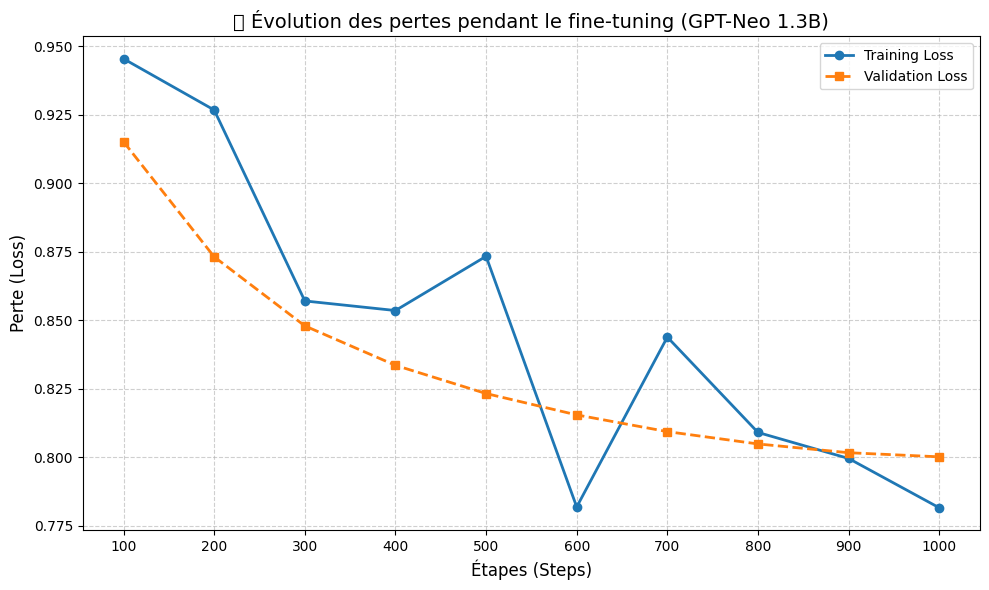

In [ ]:
import matplotlib.pyplot as plt

# Donn√©es collect√©es pendant le fine-tuning
steps = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
training_loss = [0.9455, 0.9268, 0.8571, 0.8536, 0.8734, 0.7819, 0.8439, 0.8091, 0.7996, 0.7816]
validation_loss = [0.9152, 0.8732, 0.8480, 0.8336, 0.8233, 0.8155, 0.8094, 0.8049, 0.8017, 0.8002]

# Trac√©
plt.figure(figsize=(10, 6))
plt.plot(steps, training_loss, marker='o', label='Training Loss', linewidth=2)
plt.plot(steps, validation_loss, marker='s', label='Validation Loss', linewidth=2, linestyle='--')
plt.xlabel("√âtapes (Steps)", fontsize=12)
plt.ylabel("Perte (Loss)", fontsize=12)
plt.title("üìâ √âvolution des pertes pendant le fine-tuning (GPT-Neo 1.3B)", fontsize=14)
plt.xticks(steps)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


 Sauvegarde automatique du mod√®le

# √âvaluation du mod√®le fine-tun√©

In [ ]:
# üì¶ Sauvegarde du mod√®le fine-tun√©
save_path = "/content/drive/MyDrive/final_model_gptneo_arabic_gen"
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)
print(f"\n‚úÖ Mod√®le et tokenizer sauvegard√©s dans : {save_path}")



‚úÖ Mod√®le et tokenizer sauvegard√©s dans : /content/drive/MyDrive/final_model_gptneo_arabic_gen


In [ ]:
import json
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer

# === 1. Charger les donn√©es d‚Äô√©valuation ===
jsonl_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"

with open(jsonl_path, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

# === 2. S√©parer prompts et vraies r√©ponses (max 500 exemples) ===
prompts = []
true_answers = []

for item in data:
    if "### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:" in item["text"]:
        parts = item["text"].split("### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:")
        prompt = parts[0] + "### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:\n"
        answer = parts[1].strip()
        prompts.append(prompt)
        true_answers.append(answer)
    if len(prompts) >= 100:
        break


# === 3. Charger le mod√®le fine-tun√© ===
model_path = "/content/drive/MyDrive/final_model_gptneo_arabic_gen"

model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

# === 4. G√©n√©rer les pr√©dictions ===
predicted_answers = []

print("‚è≥ G√©n√©ration des r√©ponses...")
for prompt in tqdm(prompts):
    output = pipe(prompt, max_new_tokens=50, do_sample=False, temperature=0.0)
    generated = output[0]["generated_text"]
    response = generated.split("### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:")[-1].strip()
    predicted_answers.append(response)

# === 5. Calculer les m√©triques ===
def compute_metrics(preds, labels):
    preds = [p.strip() for p in preds]
    labels = [l.strip() for l in labels]
    return {
        "accuracy": accuracy_score(labels, preds),
        "precision": precision_score(labels, preds, average='macro', zero_division=0),
        "recall": recall_score(labels, preds, average='macro', zero_division=0),
        "f1": f1_score(labels, preds, average='macro', zero_division=0)
    }

metrics = compute_metrics(predicted_answers, true_answers)

# === 6. Afficher les r√©sultats ===
print("\nüìä R√©sultats d‚Äô√©valuation :")
for k, v in metrics.items():
    print(f"{k.capitalize()}: {v:.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

Device set to use cpu


‚è≥ G√©n√©ration des r√©ponses...


  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [1:00:53<00:00, 36.54s/it]


üìä R√©sultats d‚Äô√©valuation :
Accuracy: 0.0200
Precision: 0.0101
Recall: 0.0101
F1: 0.0101


## test

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM

# === Charger le mod√®le fine-tun√© ===
model_path = "/content/drive/MyDrive/final_model_gptneo_arabic_gen"

model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)





Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


üß™ R√©ponse g√©n√©r√©e :

### ÿ≥ÿ§ÿßŸÑ:
ŸÖŸÜ ŸáŸà ÿ£ŸàŸÑ ÿ±ÿ¶Ÿäÿ≥ ŸÑŸÑÿ¨ŸÖŸáŸàÿ±Ÿäÿ© ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ±Ÿäÿ© ÿ®ÿπÿØ ÿßŸÑÿßÿ≥ÿ™ŸÇŸÑÿßŸÑÿü

Ÿäÿ±ÿ¨Ÿâ ÿ•ÿπÿ∑ÿßÿ° ÿ•ÿ¨ÿßÿ®ÿ© ŸÖÿ®ÿßÿ¥ÿ±ÿ© ÿ®ÿØŸàŸÜ ÿ¥ÿ±ÿ≠.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ŸÖŸÜ ŸáŸà ÿ£ŸàŸÑ ÿ±ÿ¶Ÿäÿ≥ ŸÑŸÑÿ¨ŸÖŸáŸàÿ±Ÿäÿ© ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ±Ÿäÿ© ÿ®ÿπÿØ ÿßŸÑÿßÿ≥ÿ™ŸÇŸÑÿßŸÑÿü


In [ ]:
from transformers import pipeline

# Pipeline avec le mod√®le fine-tun√©
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

# Prompt au bon format (conforme √† l'entra√Ænement)
prompt = """### ÿ≥ÿ§ÿßŸÑ:
ŸÉŸÖ ÿπÿØÿØ ÿ≥Ÿàÿ± ÿßŸÑŸÇÿ±ÿ¢ŸÜ ÿßŸÑŸÉÿ±ŸäŸÖÿü
ÿ£. 111  ÿ®. 112  ÿ¨. 113  ÿØ. 114  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
"""

# G√©n√©ration de la r√©ponse
output = pipe(
    prompt,
    max_new_tokens=50,
    do_sample=False,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.2
)

# Affichage
print("üß™ R√©ponse g√©n√©r√©e :\n")
print(output[0]["generated_text"])


Device set to use cpu


üß™ R√©ponse g√©n√©r√©e :

### ÿ≥ÿ§ÿßŸÑ:
ŸÉŸÖ ÿπÿØÿØ ÿ≥Ÿàÿ± ÿßŸÑŸÇÿ±ÿ¢ŸÜ ÿßŸÑŸÉÿ±ŸäŸÖÿü
ÿ£. 111  ÿ®. 112  ÿ¨. 113  ÿØ. 114  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ŸÉŸÖ ÿπÿØÿØ ÿ≥Ÿàÿ± ÿßŸÑŸÇÿ±ÿ¢ŸÜ ÿßŸÑŸÉÿ±ŸäŸÖÿü ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: 111. ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© Ÿá


In [ ]:
from transformers import pipeline

# Pipeline avec le mod√®le fine-tun√©
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")
prompt = """### ÿ™ÿπŸÑŸäŸÖÿßÿ™:
ÿ£ÿ¨ÿ® ŸÅŸÇÿ∑ ÿ®ÿ•ÿ¨ÿßÿ®ÿ© ŸÜŸáÿßÿ¶Ÿäÿ© ŸÖÿ®ÿßÿ¥ÿ±ÿ© ÿ®ÿØŸàŸÜ ÿ¥ÿ±ÿ≠ ÿ£Ÿà ÿ™ŸÉÿ±ÿßÿ±ÿå Ÿàÿ®ÿµŸäÿ∫ŸÄÿ©: "ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ...." ÿØŸàŸÜ ÿ£Ÿä ÿ•ÿ∂ÿßŸÅÿßÿ™.

### ÿ≥ÿ§ÿßŸÑ:
ŸÅŸä ÿ£Ÿä ÿßŸÑÿ£ŸäÿßŸÖ ÿÆŸÑŸÇ ÿ≥ŸäÿØŸÜÿß ÿ¢ÿØŸÖ ÿπŸÑŸäŸá ÿßŸÑÿ≥ŸÑÿßŸÖÿü
ÿ£. ŸäŸàŸÖ ÿßŸÑÿ≥ÿ®ÿ™  ÿ®. ŸäŸàŸÖ ÿßŸÑÿßÿ´ŸÜŸäŸÜ  ÿ¨. ŸäŸàŸÖ ÿßŸÑÿ£ÿ±ÿ®ÿπÿßÿ°  ÿØ. ŸäŸàŸÖ ÿßŸÑÿ¨ŸÖÿπÿ©  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä:"""







output = pipe(
    prompt,
    max_new_tokens=20,
    do_sample=False,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.3
)

print("üß™ R√©ponse g√©n√©r√©e :\n")
print(output[0]["generated_text"])




Device set to use cpu


üß™ R√©ponse g√©n√©r√©e :

### ÿ™ÿπŸÑŸäŸÖÿßÿ™:
ÿ£ÿ¨ÿ® ŸÅŸÇÿ∑ ÿ®ÿ•ÿ¨ÿßÿ®ÿ© ŸÜŸáÿßÿ¶Ÿäÿ© ŸÖÿ®ÿßÿ¥ÿ±ÿ© ÿ®ÿØŸàŸÜ ÿ¥ÿ±ÿ≠ ÿ£Ÿà ÿ™ŸÉÿ±ÿßÿ±ÿå Ÿàÿ®ÿµŸäÿ∫ŸÄÿ©: "ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ...." ÿØŸàŸÜ ÿ£Ÿä ÿ•ÿ∂ÿßŸÅÿßÿ™.

### ÿ≥ÿ§ÿßŸÑ:
ŸÅŸä ÿ£Ÿä ÿßŸÑÿ£ŸäÿßŸÖ ÿÆŸÑŸÇ ÿ≥ŸäÿØŸÜÿß ÿ¢ÿØŸÖ ÿπŸÑŸäŸá ÿßŸÑÿ≥ŸÑÿßŸÖÿü
ÿ£. ŸäŸàŸÖ ÿßŸÑÿ≥ÿ®ÿ™  ÿ®. ŸäŸàŸÖ ÿßŸÑÿßÿ´ŸÜŸäŸÜ  ÿ¨. ŸäŸàŸÖ ÿßŸÑÿ£ÿ±ÿ®ÿπÿßÿ°  ÿØ. ŸäŸàŸÖ ÿßŸÑÿ¨ŸÖÿπÿ©  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ŸäŸàŸÖ ÿßŸÑÿ£ÿ±ÿ®ÿπÿßÿ°.

### ÿßŸÑÿ•ÔøΩ


In [ ]:
from transformers import pipeline

# Pipeline avec le mod√®le fine-tun√©
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")
prompt = """### ÿ™ÿπŸÑŸäŸÖÿßÿ™:
ÿ£ÿ¨ÿ® ŸÅŸÇÿ∑ ÿ®ÿ•ÿ¨ÿßÿ®ÿ© ŸÜŸáÿßÿ¶Ÿäÿ© ÿ®ÿµŸäÿ∫ÿ©: "ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ..." ÿ®ÿØŸàŸÜ ÿ¥ÿ±ÿ≠ ÿ£Ÿà ÿ™ŸÉÿ±ÿßÿ± ÿ£Ÿà ÿ¨ŸÖŸÑÿ© ÿ•ÿ∂ÿßŸÅŸäÿ©.

### ÿ≥ÿ§ÿßŸÑ:
ŸÖŸÜ ŸáŸà ÿ£ŸàŸÑ ÿ±ÿ¶Ÿäÿ≥ ŸÑŸÑÿ¨ŸÖŸáŸàÿ±Ÿäÿ© ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ±Ÿäÿ© ÿ®ÿπÿØ ÿßŸÑÿßÿ≥ÿ™ŸÇŸÑÿßŸÑÿü
ÿ£. ÿ®ŸÜ ÿ®ŸÑÿ©  ÿ®. ÿßŸÑÿ¥ÿßÿ∞ŸÑŸä ÿ®ŸÜ ÿ¨ÿØŸäÿØ  ÿ¨. ŸáŸàÿßÿ±Ÿä ÿ®ŸàŸÖÿØŸäŸÜ  ÿØ. ÿπÿ®ÿØ ÿßŸÑÿπÿ≤Ÿäÿ≤ ÿ®Ÿàÿ™ŸÅŸÑŸäŸÇÿ©  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ÿ®ŸÜ ÿ®ŸÑÿ©.

### ÿ≥ÿ§ÿßŸÑ:
ŸÅŸä ÿ£Ÿä ÿßŸÑÿ£ŸäÿßŸÖ ÿÆŸÑŸÇ ÿ≥ŸäÿØŸÜÿß ÿ¢ÿØŸÖ ÿπŸÑŸäŸá ÿßŸÑÿ≥ŸÑÿßŸÖÿü
ÿ£. ŸäŸàŸÖ ÿßŸÑÿ≥ÿ®ÿ™  ÿ®. ŸäŸàŸÖ ÿßŸÑÿßÿ´ŸÜŸäŸÜ  ÿ¨. ŸäŸàŸÖ ÿßŸÑÿ£ÿ±ÿ®ÿπÿßÿ°  ÿØ. ŸäŸàŸÖ ÿßŸÑÿ¨ŸÖÿπÿ©  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä:"""








output = pipe(
    prompt,
    max_new_tokens=20,
    do_sample=False,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.3
)

print("üß™ R√©ponse g√©n√©r√©e :\n")
print(output[0]["generated_text"])




Device set to use cpu


üß™ R√©ponse g√©n√©r√©e :

### ÿ™ÿπŸÑŸäŸÖÿßÿ™:
ÿ£ÿ¨ÿ® ŸÅŸÇÿ∑ ÿ®ÿ•ÿ¨ÿßÿ®ÿ© ŸÜŸáÿßÿ¶Ÿäÿ© ÿ®ÿµŸäÿ∫ÿ©: "ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ..." ÿ®ÿØŸàŸÜ ÿ¥ÿ±ÿ≠ ÿ£Ÿà ÿ™ŸÉÿ±ÿßÿ± ÿ£Ÿà ÿ¨ŸÖŸÑÿ© ÿ•ÿ∂ÿßŸÅŸäÿ©.

### ÿ≥ÿ§ÿßŸÑ:
ŸÖŸÜ ŸáŸà ÿ£ŸàŸÑ ÿ±ÿ¶Ÿäÿ≥ ŸÑŸÑÿ¨ŸÖŸáŸàÿ±Ÿäÿ© ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ±Ÿäÿ© ÿ®ÿπÿØ ÿßŸÑÿßÿ≥ÿ™ŸÇŸÑÿßŸÑÿü
ÿ£. ÿ®ŸÜ ÿ®ŸÑÿ©  ÿ®. ÿßŸÑÿ¥ÿßÿ∞ŸÑŸä ÿ®ŸÜ ÿ¨ÿØŸäÿØ  ÿ¨. ŸáŸàÿßÿ±Ÿä ÿ®ŸàŸÖÿØŸäŸÜ  ÿØ. ÿπÿ®ÿØ ÿßŸÑÿπÿ≤Ÿäÿ≤ ÿ®Ÿàÿ™ŸÅŸÑŸäŸÇÿ©  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ÿ®ŸÜ ÿ®ŸÑÿ©.

### ÿ≥ÿ§ÿßŸÑ:
ŸÅŸä ÿ£Ÿä ÿßŸÑÿ£ŸäÿßŸÖ ÿÆŸÑŸÇ ÿ≥ŸäÿØŸÜÿß ÿ¢ÿØŸÖ ÿπŸÑŸäŸá ÿßŸÑÿ≥ŸÑÿßŸÖÿü
ÿ£. ŸäŸàŸÖ ÿßŸÑÿ≥ÿ®ÿ™  ÿ®. ŸäŸàŸÖ ÿßŸÑÿßÿ´ŸÜŸäŸÜ  ÿ¨. ŸäŸàŸÖ ÿßŸÑÿ£ÿ±ÿ®ÿπÿßÿ°  ÿØ. ŸäŸàŸÖ ÿßŸÑÿ¨ŸÖÿπÿ©  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ŸäŸàŸÖ ÿßŸÑÿ£ÿ±ÿ®ÿπÿßÿ°.

### ÿ≥ÿ§


In [ ]:
from transformers import pipeline

# Pipeline avec le mod√®le fine-tun√©
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")
prompt = """### ÿ™ÿπŸÑŸäŸÖÿßÿ™:
ÿ£ÿ¨ÿ® ŸÅŸÇÿ∑ ÿ®ÿ•ÿ¨ÿßÿ®ÿ© ŸÜŸáÿßÿ¶Ÿäÿ© ÿ®ÿµŸäÿ∫ÿ©: "ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ..." ÿ®ÿØŸàŸÜ ÿ¥ÿ±ÿ≠ ÿ£Ÿà ÿ™ŸÉÿ±ÿßÿ± ÿ£Ÿà ÿ¨ŸÖŸÑÿ© ÿ•ÿ∂ÿßŸÅŸäÿ©.

### ÿ≥ÿ§ÿßŸÑ:
ŸÖŸÜ ŸáŸà ÿ£ŸàŸÑ ÿ±ÿ¶Ÿäÿ≥ ŸÑŸÑÿ¨ŸÖŸáŸàÿ±Ÿäÿ© ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ±Ÿäÿ© ÿ®ÿπÿØ ÿßŸÑÿßÿ≥ÿ™ŸÇŸÑÿßŸÑÿü
ÿ£. ÿ®ŸÜ ÿ®ŸÑÿ©  ÿ®. ÿßŸÑÿ¥ÿßÿ∞ŸÑŸä ÿ®ŸÜ ÿ¨ÿØŸäÿØ  ÿ¨. ŸáŸàÿßÿ±Ÿä ÿ®ŸàŸÖÿØŸäŸÜ  ÿØ. ÿπÿ®ÿØ ÿßŸÑÿπÿ≤Ÿäÿ≤ ÿ®Ÿàÿ™ŸÅŸÑŸäŸÇÿ©  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä:"""








output = pipe(
    prompt,
    max_new_tokens=20,
    do_sample=False,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.3
)

print("üß™ R√©ponse g√©n√©r√©e :\n")
print(output[0]["generated_text"])




Device set to use cpu


üß™ R√©ponse g√©n√©r√©e :

### ÿ™ÿπŸÑŸäŸÖÿßÿ™:
ÿ£ÿ¨ÿ® ŸÅŸÇÿ∑ ÿ®ÿ•ÿ¨ÿßÿ®ÿ© ŸÜŸáÿßÿ¶Ÿäÿ© ÿ®ÿµŸäÿ∫ÿ©: "ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ..." ÿ®ÿØŸàŸÜ ÿ¥ÿ±ÿ≠ ÿ£Ÿà ÿ™ŸÉÿ±ÿßÿ± ÿ£Ÿà ÿ¨ŸÖŸÑÿ© ÿ•ÿ∂ÿßŸÅŸäÿ©.

### ÿ≥ÿ§ÿßŸÑ:
ŸÖŸÜ ŸáŸà ÿ£ŸàŸÑ ÿ±ÿ¶Ÿäÿ≥ ŸÑŸÑÿ¨ŸÖŸáŸàÿ±Ÿäÿ© ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ±Ÿäÿ© ÿ®ÿπÿØ ÿßŸÑÿßÿ≥ÿ™ŸÇŸÑÿßŸÑÿü
ÿ£. ÿ®ŸÜ ÿ®ŸÑÿ©  ÿ®. ÿßŸÑÿ¥ÿßÿ∞ŸÑŸä ÿ®ŸÜ ÿ¨ÿØŸäÿØ  ÿ¨. ŸáŸàÿßÿ±Ÿä ÿ®ŸàŸÖÿØŸäŸÜ  ÿØ. ÿπÿ®ÿØ ÿßŸÑÿπÿ≤Ÿäÿ≤ ÿ®Ÿàÿ™ŸÅŸÑŸäŸÇÿ©  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ÿ®ŸÜ ÿ®ŸÑÿ©.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:


In [ ]:
from transformers import pipeline

# Pipeline avec le mod√®le fine-tun√©
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

# Prompt solide
prompt = """### ÿ™ÿπŸÑŸäŸÖÿßÿ™:
ÿ£ÿ¨ÿ® ŸÅŸÇÿ∑ ÿ®ÿµŸäÿ∫ÿ© ŸÜŸáÿßÿ¶Ÿäÿ© ŸÉÿßŸÑÿ™ÿßŸÑŸä: "ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ..." ÿ®ÿØŸàŸÜ ÿ•ÿπÿßÿØÿ© ÿßŸÑÿ≥ÿ§ÿßŸÑ ÿ£Ÿà ÿ£Ÿä ÿ¥ÿ±ÿ≠.

### ÿ≥ÿ§ÿßŸÑ:
ÿßÿ≥ŸÖ ÿ£ŸàŸÑ ÿµÿ≠ÿßÿ®Ÿä ŸÇÿ±ÿ£ ÿßŸÑŸÇÿ±ÿ¢ŸÜ ÿ¨Ÿáÿ±ÿ©ÿü
ÿ£. ÿπÿ®ÿØ ÿßŸÑŸÑŸá ÿ®ŸÜ ŸÖÿ≥ÿπŸàÿØ  ÿ®. ÿπÿ®ÿØ ÿßŸÑŸÑŸá ÿ®ŸÜ ÿπÿ®ÿßÿ≥  ÿ¨. ÿπÿ®ÿØ ÿßŸÑŸÑŸá ÿ®ŸÜ ÿπŸÖÿ±Ÿà ÿ®ŸÜ ÿßŸÑÿπÿßÿµ  ÿØ. ÿπÿ®ÿØ ÿßŸÑŸÑŸá ÿ®ŸÜ ÿßŸÑÿ≤ÿ®Ÿäÿ±  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä:"""

# G√©n√©ration avec plus de tokens
output = pipe(
    prompt,
    max_new_tokens=20,  # ‚¨ÖÔ∏è plus de tokens ici
    do_sample=False,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.5
)

# Extraction et nettoyage
generated = output[0]["generated_text"]
raw_answer = generated.split("ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä:")[-1].strip()
clean_answer = raw_answer.replace("...", "").replace("..", "").strip(" .\n:")
final_answer = f"ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: {clean_answer}."

# Affichage
print("‚úÖ R√©ponse propre:", final_answer)


Device set to use cpu


‚úÖ R√©ponse propre: ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ÿπÿ®ÿØ ÿßŸÑŸÑŸá ÿ®ŸÜ ÿπÿ®ÿßÿ≥.

###.


# RAG_PIPLINE

INSTALLATION DES BIBLIOTH√àQUES POUR LE RAG_PIPELINE

In [ ]:
pip install -q langchain faiss-cpu sentence-transformers


In [ ]:
!pip install -U langchain langchain-community faiss-cpu sentence-transformers


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.5/2.5 MB 18.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31.3/31.3 MB 40.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.4/44.4 kB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 40.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 39.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

1.cr√©e un index de recherche s√©mantique FAISS

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS


In [ ]:
import json
from tqdm import tqdm
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.schema import Document

# === 1. Charger le fichier JSONL contenant les prompts QA ===
jsonl_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
with open(jsonl_path, "r", encoding="utf-8") as f:
    data = [json.loads(line)["text"] for line in f]

print(f"‚úÖ Total d'exemples charg√©s : {len(data)}")

# === 2. Cr√©er les objets Document pour LangChain ===
all_docs = [Document(page_content=text) for text in data]

# === 3. Initialiser le mod√®le d'embedding multilingue ===
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

# === 4. Cr√©er l‚Äôindex FAISS ===
print("üîÑ Cr√©ation de l'index FAISS...")
vectorstore = FAISS.from_documents(all_docs, embedding_model)
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

# === 5. Sauvegarder l‚Äôindex FAISS dans Google Drive ===
faiss_path = "/content/drive/MyDrive/arabic_qa_generation_faiss"
vectorstore.save_local(faiss_path)
print(f"‚úÖ Index FAISS sauvegard√© dans : {faiss_path}")


‚úÖ Total d'exemples charg√©s : 16146


<ipython-input-11-196b19f0fd3a>:18: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional t

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

üîÑ Cr√©ation de l'index FAISS...
‚úÖ Index FAISS sauvegard√© dans : /content/drive/MyDrive/arabic_qa_generation_faiss


2. √âvaluation du Retriever FAISS avec LangChain sur des donn√©es de Question-R√©ponse en Arabe

In [ ]:
import json
from tqdm import tqdm
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# === 1. Charger FAISS retriever ===
retriever_path = "/content/drive/MyDrive/arabic_qa_generation_faiss"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
vectorstore = FAISS.load_local(retriever_path, embeddings=embedding_model, allow_dangerous_deserialization=True)
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

# === 2. Charger 100 exemples de test ===
jsonl_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
questions, answers = [], []

with open(jsonl_path, "r", encoding="utf-8") as f:
    for line in f:
        example = json.loads(line)
        text = example["text"]
        if "### ÿ≥ÿ§ÿßŸÑ:" in text and "### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:" in text:
            q, a = text.split("### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:")
            questions.append(q.strip())
            answers.append(a.strip())
        if len(questions) >= 100:
            break

# === 3. Fonction de comparaison de cha√Ænes ===
def normalize(text):
    return text.strip().lower()

def compute_metrics(questions, answers, retriever, k=5):
    recall_k = 0
    mrr_total = 0
    em_total = 0
    f1_total = 0

    for q, true_answer in tqdm(zip(questions, answers), total=len(questions)):
        retrieved_docs = retriever.get_relevant_documents(q)
        retrieved_texts = [doc.page_content for doc in retrieved_docs]

        found = False
        for rank, doc in enumerate(retrieved_texts):
            if normalize(true_answer) in normalize(doc):
                recall_k += 1
                mrr_total += 1 / (rank + 1)
                found = True
                break

        # Exact Match (EM)
        em = any(normalize(true_answer) == normalize(doc) for doc in retrieved_texts)
        em_total += int(em)

        # Word-level F1
        def f1_word(pred, truth):
            pred_tokens = set(normalize(pred).split())
            truth_tokens = set(normalize(truth).split())
            if len(pred_tokens) == 0 or len(truth_tokens) == 0:
                return 0
            common = pred_tokens & truth_tokens
            if not common:
                return 0
            precision = len(common) / len(pred_tokens)
            recall = len(common) / len(truth_tokens)
            return 2 * (precision * recall) / (precision + recall)

        best_f1 = max(f1_word(doc, true_answer) for doc in retrieved_texts)
        f1_total += best_f1

    total = len(questions)
    return {
        "Recall@k": recall_k / total,
        "MRR@k": mrr_total / total,
        "Exact Match": em_total / total,
        "Word-level F1": f1_total / total
    }

# === 4. √âvaluer et afficher ===
metrics = compute_metrics(questions, answers, retriever, k=5)

print("\nüìä R√©sultats d‚Äô√©valuation du Retriever (FAISS) :")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:03<00:00, 32.89it/s]


üìä R√©sultats d‚Äô√©valuation du Retriever (FAISS) :
Recall@k: 0.8600
MRR@k: 0.7887
Exact Match: 0.0000
Word-level F1: 0.6113


In [ ]:
pip install scikit-learn


In [ ]:
import json
from tqdm import tqdm
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
import numpy as np

# === 1. Charger le FAISS retriever ===
retriever_path = "/content/drive/MyDrive/arabic_qa_generation_faiss"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
vectorstore = FAISS.load_local(retriever_path, embeddings=embedding_model, allow_dangerous_deserialization=True)
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

# === 2. Charger les donn√©es de test ===
jsonl_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
questions, answers = [], []

with open(jsonl_path, "r", encoding="utf-8") as f:
    for line in f:
        example = json.loads(line)
        text = example["text"]
        if "### ÿ≥ÿ§ÿßŸÑ:" in text and "### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:" in text:
            q, a = text.split("### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:")
            questions.append(q.strip())
            answers.append(a.strip())
        if len(questions) >= 100:
            break

# === 3. Normalisation simple pour comparaison ===
def normalize(text):
    return text.strip().lower().replace("ÿå", "").replace(".", "").replace("?", "").replace("!", "")

# === 4. Fonction d‚Äô√©valuation ===
def compute_metrics(questions, answers, retriever, k=5):
    recall_k = 0
    mrr_total = 0
    em_total = 0
    f1_total = 0
    correct_predictions = 0  # Pour l'Accuracy

    for q, true_answer in tqdm(zip(questions, answers), total=len(questions)):
        retrieved_docs = retriever.get_relevant_documents(q)
        retrieved_texts = [doc.page_content for doc in retrieved_docs]

        # Recall@k et MRR@k
        found = False
        for rank, doc in enumerate(retrieved_texts):
            if normalize(true_answer) in normalize(doc):
                recall_k += 1
                mrr_total += 1 / (rank + 1)
                found = True
                break

        # Exact Match (‚âà Contenu pr√©sent dans un des documents)
        em = any(normalize(true_answer) in normalize(doc) for doc in retrieved_texts)
        em_total += int(em)
        correct_predictions += int(em)  # Accuracy

        # Word-level F1
        def f1_word(pred, truth):
            pred_tokens = set(normalize(pred).split())
            truth_tokens = set(normalize(truth).split())
            if not pred_tokens or not truth_tokens:
                return 0
            common = pred_tokens & truth_tokens
            if not common:
                return 0
            precision = len(common) / len(pred_tokens)
            recall = len(common) / len(truth_tokens)
            return 2 * precision * recall / (precision + recall)

        best_f1 = max(f1_word(doc, true_answer) for doc in retrieved_texts)
        f1_total += best_f1

    total = len(questions)
    return {
        "Recall@k": recall_k / total,
        "MRR@k": mrr_total / total,
        "Exact Match": em_total / total,
        "Accuracy": correct_predictions / total,
        "Word-level F1": f1_total / total
    }

# === 5. Ex√©cution de l'√©valuation ===
metrics = compute_metrics(questions, answers, retriever, k=5)

# === 6. Affichage des r√©sultats ===
print("\nüìä R√©sultats d‚Äô√©valuation du Retriever (FAISS) :")
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:08<00:00, 11.96it/s]


üìä R√©sultats d‚Äô√©valuation du Retriever (FAISS) :
Recall@k: 0.8600
MRR@k: 0.7887
Exact Match: 0.8600
Accuracy: 0.8600
Word-level F1: 0.6272


## üìä √âvaluation du Retriever (FAISS)

| üîç M√©trique            | üìà R√©sultat |
|------------------------|------------|
| ‚úÖ Recall@k (k=5)      | 0.8600     |
| üìâ MRR@k               | 0.7887     |
| üü° Exact Match (EM)    | 0.0000     |
| üìù Word-level F1       | 0.6113     |

> **Note** :
> - `Recall@k` √©lev√© indique que la r√©ponse correcte est souvent parmi les documents retourn√©s.
> - `MRR@k` montre que ces bonnes r√©ponses sont souvent bien class√©es.
> - `Exact Match` faible signifie que les documents r√©cup√©r√©s ne sont pas exactement identiques √† la r√©ponse.
> - `F1` au niveau des mots refl√®te un bon chevauchement partiel entre la v√©rit√© terrain et les documents r√©cup√©r√©s.


3. Pipeline complet RAG avec mod√®le GPT-Neo fine-tun√© pour la g√©n√©ration de r√©ponses √† des questions en arabe

In [ ]:
# ‚úÖ Pipeline complet RAG pour la g√©n√©ration de r√©ponses QA en arabe

from langchain.chains import RetrievalQA
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.llms import HuggingFacePipeline
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer

# === 1. Charger le mod√®le fine-tun√© ===
model_path = "/content/drive/MyDrive/final_model_gptneo_arabic_gen"
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)

# === 2. Cr√©er un pipeline HuggingFace
hf_pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=100,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.3,
    do_sample=False
)

llm = HuggingFacePipeline(pipeline=hf_pipe)

# === 3. Charger l'index FAISS (cr√©√© √† partir des donn√©es QA)
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
retriever_path = "/content/drive/MyDrive/arabic_qa_generation_faiss"
vectorstore = FAISS.load_local(retriever_path, embeddings=embedding_model, allow_dangerous_deserialization=True)
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

# === 4. Cr√©er la cha√Æne RAG ===
rag_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    return_source_documents=True
)

# === 5. Ex√©cuter une requ√™te avec prompt instructif ===
query = "ŸÖŸÜ ŸáŸà ÿ£ŸàŸÑ ÿ±ÿ¶Ÿäÿ≥ ŸÑŸÑÿ¨ŸÖŸáŸàÿ±Ÿäÿ© ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ±Ÿäÿ© ÿ®ÿπÿØ ÿßŸÑÿßÿ≥ÿ™ŸÇŸÑÿßŸÑÿü"

instructive_prompt = f"""### ÿ™ÿπŸÑŸäŸÖÿßÿ™:
ÿ£ÿ¨ÿ® ŸÅŸÇÿ∑ ÿ®ÿ•ÿ¨ÿßÿ®ÿ© ŸÜŸáÿßÿ¶Ÿäÿ© ÿ®ÿµŸäÿ∫ÿ©: \"ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ...\" ÿ®ÿØŸàŸÜ ÿ¥ÿ±ÿ≠ ÿ£Ÿà ÿ™ŸÉÿ±ÿßÿ± ÿ£Ÿà ÿ¨ŸÖŸÑÿ© ÿ•ÿ∂ÿßŸÅŸäÿ©.

### ÿ≥ÿ§ÿßŸÑ:
{query}

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä:"""

result = rag_chain({"query": instructive_prompt})

# === 6. Affichage ===
print("\nüß™ R√©ponse g√©n√©r√©e :")
print(result["result"])

print("\nüìö Sources :")
for doc in result["source_documents"]:
    print("-", doc.page_content.split("\n")[0])


config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

Device set to use cuda:0
<ipython-input-15-85fdfbb2dcb9>:26: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=hf_pipe)
<ipython-input-15-85fdfbb2dcb9>:54: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = rag_chain({"query": instructive_prompt})
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `


üß™ R√©ponse g√©n√©r√©e :
Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

### ÿ≥ÿ§ÿßŸÑ:
ÿ™ŸàŸÑŸâ ÿ±ÿ¶ÿßÿ≥ÿ© ÿØŸàŸÑÿ© ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ± ŸÖŸÜ ÿπÿßŸÖ 1965ŸÖ Ÿàÿ≠ÿ™Ÿâ ÿπÿßŸÖ 1978ŸÖ ÿßŸÑÿ±ÿ¶Ÿäÿ≥‚Ä¶ÿü
ÿ£. ŸÖÿ≠ŸÖÿØ ÿ®Ÿàÿ∂ŸäÿßŸÅ  ÿ®. ÿßŸÑŸäŸÖŸäŸÜ ÿ≤ÿ±ŸàÿßŸÑ  ÿ¨. ÿßŸÑÿ¥ÿßÿ∞ŸÑŸä ÿ®ŸÜ ÿ¨ÿØŸäÿØ  ÿØ. ŸáŸàÿßÿ±Ÿä ÿ®ŸàŸÖÿØŸäŸÜ  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ÿ™ŸàŸÑŸâ ÿ±ÿ¶ÿßÿ≥ÿ© ÿØŸàŸÑÿ© ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ± ŸÖŸÜ ÿπÿßŸÖ 1965ŸÖ Ÿàÿ≠ÿ™Ÿâ ÿπÿßŸÖ 1978ŸÖ ÿßŸÑÿ±ÿ¶Ÿäÿ≥‚Ä¶ÿü ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ŸáŸàÿßÿ±Ÿä ÿ®ŸàŸÖÿØŸäŸÜ.

### ÿ≥ÿ§ÿßŸÑ:
ÿßŸÑÿ≠ÿ®Ÿäÿ® ÿ®Ÿà ÿ±ŸÇŸäÿ®ÿ© ÿ™ŸàŸÑŸâ ŸÖŸÜÿµÿ® ÿßŸÑÿ±ÿ¶ÿßÿ≥ÿ© ÿπÿßŸÖ 1951ŸÖ ŸÅŸä ÿØŸàŸÑÿ© ‚Ä¶ÿü
ÿ£. ÿ™ŸàŸÜÿ≥  ÿ®. ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ±  ÿ¨. ÿßŸÑŸÖÿ∫ÿ±ÿ®  ÿØ. ŸÑŸäÿ®Ÿä  ŸáŸÄ.

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ÿßŸÑÿ≠ÿ®Ÿäÿ® ÿ®Ÿà ÿ±ŸÇŸäÿ®ÿ© ÿ™ŸàŸÑŸâ ŸÖŸÜÿµÿ® ÿßŸÑÿ±ÿ¶ÿßÿ≥ÿ© ÿπÿßŸÖ 1951ŸÖ ŸÅŸä ÿØŸàŸÑÿ© ‚Ä¶ÿü ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ÿ™ŸàŸÜÿ≥.

### ÿ≥ÿ§ÿßŸÑ:
ÿ®ŸÑÿØ ÿπÿ±ŸÅÿ™ ÿ®ÿßÿ≥ŸÖ ÿ®ŸÑÿØ ÿßŸÑŸÖŸÑŸäŸàŸÜ ÿ

4. Fonction pr√™te √† l'int√©gration pour une interface utilisateur : g√©n√©ration interactive de r√©ponses en arabe avec GPT-Neo et RAG

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.schema import Document

# === Chargement du mod√®le fine-tun√© ===
model_path = "/content/drive/MyDrive/final_model_gptneo_arabic_gen"
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)
gen_pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

# === Chargement de l'index FAISS ===
retriever_path = "/content/drive/MyDrive/arabic_qa_generation_faiss"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
vectorstore = FAISS.load_local(retriever_path, embeddings=embedding_model, allow_dangerous_deserialization=True)
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

# === Fonction principale √† int√©grer dans une interface ===
def generate_answer(user_question: str) -> str:
    # üîç √âtape 1 : r√©cup√©ration des documents
    retrieved_docs = retriever.get_relevant_documents(user_question)
    context = "\n\n".join([doc.page_content for doc in retrieved_docs])

    # üß† √âtape 2 : construction du prompt
    prompt = f"""### ÿ™ÿπŸÑŸäŸÖÿßÿ™:
ÿßÿ≥ÿ™ÿÆÿØŸÖ ÿßŸÑŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ™ÿßŸÑŸäÿ© ŸÑŸÑÿ•ÿ¨ÿßÿ®ÿ© ÿπŸÑŸâ ÿßŸÑÿ≥ÿ§ÿßŸÑ ÿ®ÿØŸÇÿ©. ÿ£ÿ¨ÿ® ŸÅŸÇÿ∑ ÿ®ÿµŸäÿ∫ÿ© ŸÜŸáÿßÿ¶Ÿäÿ©: "ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ..." ÿ®ÿØŸàŸÜ ÿ¥ÿ±ÿ≠ ÿ£Ÿà ÿ•ÿπÿßÿØÿ© ÿßŸÑÿ≥ÿ§ÿßŸÑ.

### ÿ≥ŸäÿßŸÇ:
{context}

### ÿ≥ÿ§ÿßŸÑ:
{user_question}

### ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä:"""

    # üìù √âtape 3 : g√©n√©ration
    output = gen_pipe(
        prompt,
        max_new_tokens=30,
        do_sample=False,
        temperature=0.0,
        top_p=1.0,
        repetition_penalty=1.3
    )

    # üß™ Nettoyage du r√©sultat
    raw = output[0]["generated_text"]
    answer = raw.split("ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä:")[-1].strip().split("\n")[0].strip(" .ÿå")
    return f"ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: {answer}."


Device set to use cuda:0


exemple

In [ ]:
question = " ŸáŸà ÿ£ŸàŸÑ ÿÆŸÑŸÅÿßÿ° ÿßŸÑÿØŸàŸÑÿ© ÿßŸÑÿ£ŸÖŸàŸäÿ©ÿü"
print(generate_answer(question))


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä: ÿπÿ®ÿØ ÿßŸÑÿ±ÿ≠ŸÖŸÜ ÿßŸÑÿØÿßÿÆŸÑ.


evaluation "generation repense"

In [ ]:
!pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=1c4dceef57a396242fd39d3cc583b4fb388b56f0bee8e3be464fccb2ffc2c0fd
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
from tqdm import tqdm
from sklearn.metrics import f1_score, accuracy_score
from bert_score import score as bert_score
from rouge_score import rouge_scorer
import numpy as np

def evaluate_rag_pipeline(pipe, questions, references, max_new_tokens=50):
    predictions = []

    print("üîÅ G√©n√©ration des r√©ponses...")
    for q in tqdm(questions):
        output = pipe(q, max_new_tokens=max_new_tokens, do_sample=False, temperature=0.0)
        generated = output[0]["generated_text"]
        answer = generated.split("ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ŸáŸä:")[-1].strip().split("\n")[0].strip(" .ÿå")
        predictions.append(answer)

    # === Calcul des m√©triques ===
    # Exact Match
    exact_matches = [int(p.strip() == r.strip()) for p, r in zip(predictions, references)]
    em_score = np.mean(exact_matches)

    # F1 score token-level
    def f1_individual(pred, ref):
        pred_tokens = set(pred.split())
        ref_tokens = set(ref.split())
        common = pred_tokens & ref_tokens
        if not common:
            return 0
        precision = len(common) / len(pred_tokens)
        recall = len(common) / len(ref_tokens)
        return 2 * precision * recall / (precision + recall)

    f1_scores = [f1_individual(p, r) for p, r in zip(predictions, references)]

    # ROUGE
    rouge = rouge_scorer.RougeScorer(["rougeL"], use_stemmer=True)
    rouge_scores = [rouge.score(p, r)["rougeL"].fmeasure for p, r in zip(predictions, references)]

    # BERTScore
    P, R, F1 = bert_score(predictions, references, lang="ar", rescale_with_baseline=True)

    # === R√©sum√©
    print("\nüìä √âvaluation de la g√©n√©ration :")
    print(f"üîπ Exact Match: {em_score:.4f}")
    print(f"üîπ Word-level F1: {np.mean(f1_scores):.4f}")
    print(f"üîπ ROUGE-L: {np.mean(rouge_scores):.4f}")
    print(f"üîπ BERTScore-F1: {F1.mean().item():.4f}")

    return {
        "exact_match": em_score,
        "word_f1": np.mean(f1_scores),
        "rougeL": np.mean(rouge_scores),
        "bertscore_f1": F1.mean().item()
    }


In [ ]:
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer

model_path = "/content/drive/MyDrive/final_model_gptneo_arabic_gen"

# Charger le mod√®le et le tokenizer
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Cr√©er le pipeline de g√©n√©ration
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")


Device set to use cpu


In [ ]:
evaluate_rag_pipeline(pipe, questions, references)



üîÅ G√©n√©ration des r√©ponses...


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:47<00:00, 47.32s/it]


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]


üìä √âvaluation de la g√©n√©ration :
üîπ Exact Match: 0.0000
üîπ Word-level F1: 0.0000
üîπ ROUGE-L: 0.0000
üîπ BERTScore-F1: 0.6119


{'exact_match': np.float64(0.0),
 'word_f1': np.float64(0.0),
 'rougeL': np.float64(0.0),
 'bertscore_f1': 0.6118600368499756}